
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [189]:
my_cols = pd.read_csv('./data/heart_disease/columns.csv',
                      delimiter=",",
                      quotechar= '"').column.values.tolist()

my_cols

['age, "age in years"',
 'sex, "sex (1 = male  0 = female)"',
 'cp, "chest pain type, Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic"',
 'trestbps, "resting blood pressure (in mm Hg on admission to the hospital)"',
 'chol, "serum cholestoral in mg/dl"',
 'fbs, "(fasting blood sugar > 120 mg/dl)  (1 = true  0 = false)"',
 'restecg, "resting electrocardiographic results, Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes\' criteria"',
 'thalach, "maximum heart rate achieved"',
 'exang, "exercise induced angina (1 = yes  0 = no)"',
 'oldpeak, "ST depression induced by exercise relative to rest"',
 'slope, "the slope of the peak exercise ST segment, Value 1: upsloping, Value 2: flat, Value 3: downsloping"',
 'ca, "number of major vessels (0-3) colored by flouroscopy"',
 'thal, "3 = normal  6 

In [190]:
columnas = [col.split(',')[0].strip() for col in my_cols]
print(columnas)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [191]:
df = pd.read_csv('./data/heart_disease/processed.cleveland.data', sep = ',', header = None, names = columnas)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

### Analisis Exploratorio

In [192]:
df.shape

(303, 14)

In [193]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [195]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Text(0.5, 1.0, 'Cant de Mujeres vs Cant de Hombres')

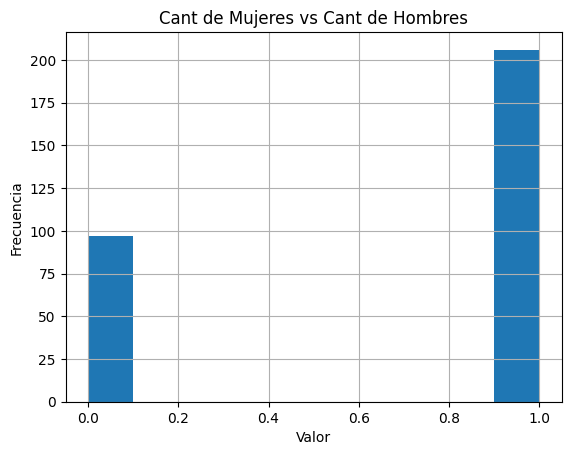

In [196]:
df['sex'].hist()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Cant de Mujeres vs Cant de Hombres')

Text(0.5, 1.0, 'Relación entre la Edad y la Presion en Reposo')

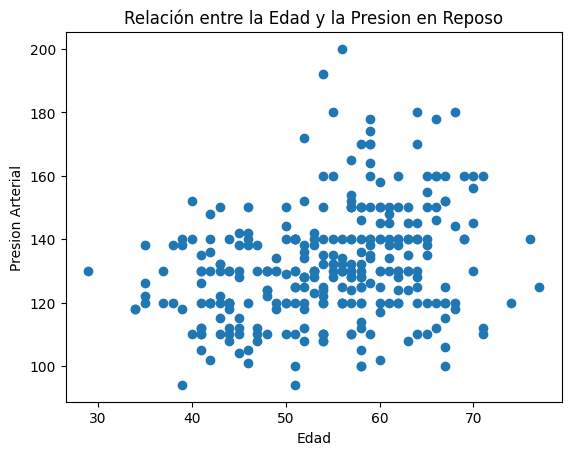

In [197]:
# Diagrama de dispersión entre la Edad y la Presion en Reposo
plt.scatter(df['age'], df['trestbps'])
plt.xlabel('Edad')
plt.ylabel('Presion Arterial')
plt.title('Relación entre la Edad y la Presion en Reposo')

In [198]:
# Realizar las transformaciones necesarias en el DataFrame
df['sex'] = df['sex'].astype('category')  # Convertir 'sex' en variable categórica
df['cp'] = df['cp'].astype('category')  # Convertir 'cp' en variable categórica
df['fbs'] = df['fbs'].astype('category')  # Convertir 'fbs' en variable categórica
df['restecg'] = df['restecg'].astype('category')  # Convertir 'restecg' en variable categórica
df['exang'] = df['exang'].astype('category')  # Convertir 'exang' en variable categórica
df['slope'] = df['slope'].astype('category')  # Convertir 'slope' en variable categórica
df['ca'] = df['ca'].astype('category')  # Convertir 'ca' en variable categórica
df['thal'] = df['thal'].astype('category')  # Convertir 'thal' en variable categórica
df['num'] = df['num'].astype('category')  # Convertir 'num' en variable categórica

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  num       303 non-null    category
dtypes: category(9), float64(5)
memory usage: 16.1 KB


In [200]:
Variables_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Text(0.5, 1.0, 'Matriz de correlación')

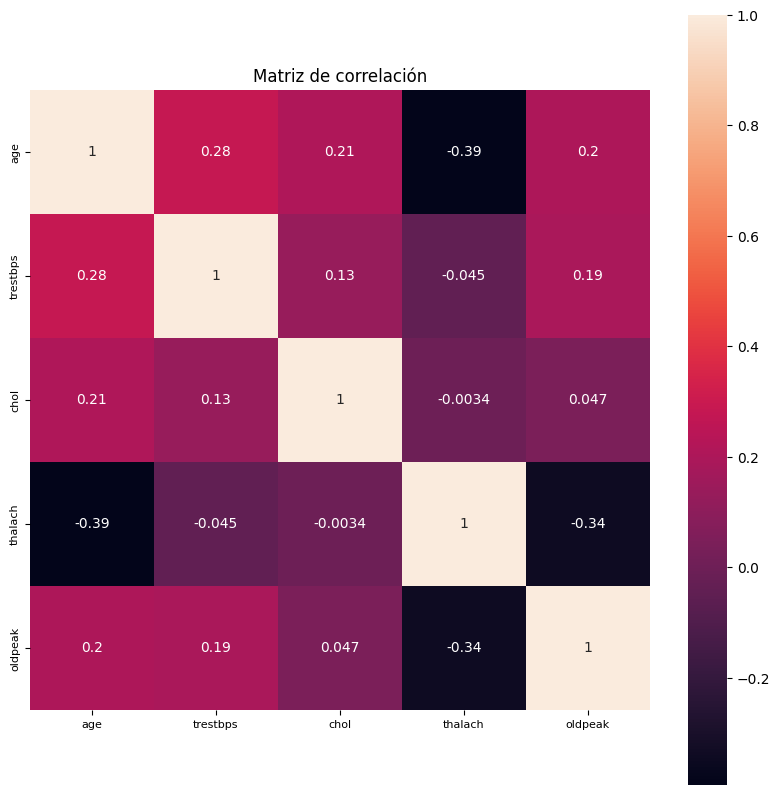

In [201]:
#MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
num_vars = df.select_dtypes(include=['float64', 'int64'])

# crear la matriz de correlación
corr_matrix = num_vars.corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(corr_matrix,square = True, ax = ax, annot=True)
ax.tick_params(labelsize = 8)
plt.title('Matriz de correlación')

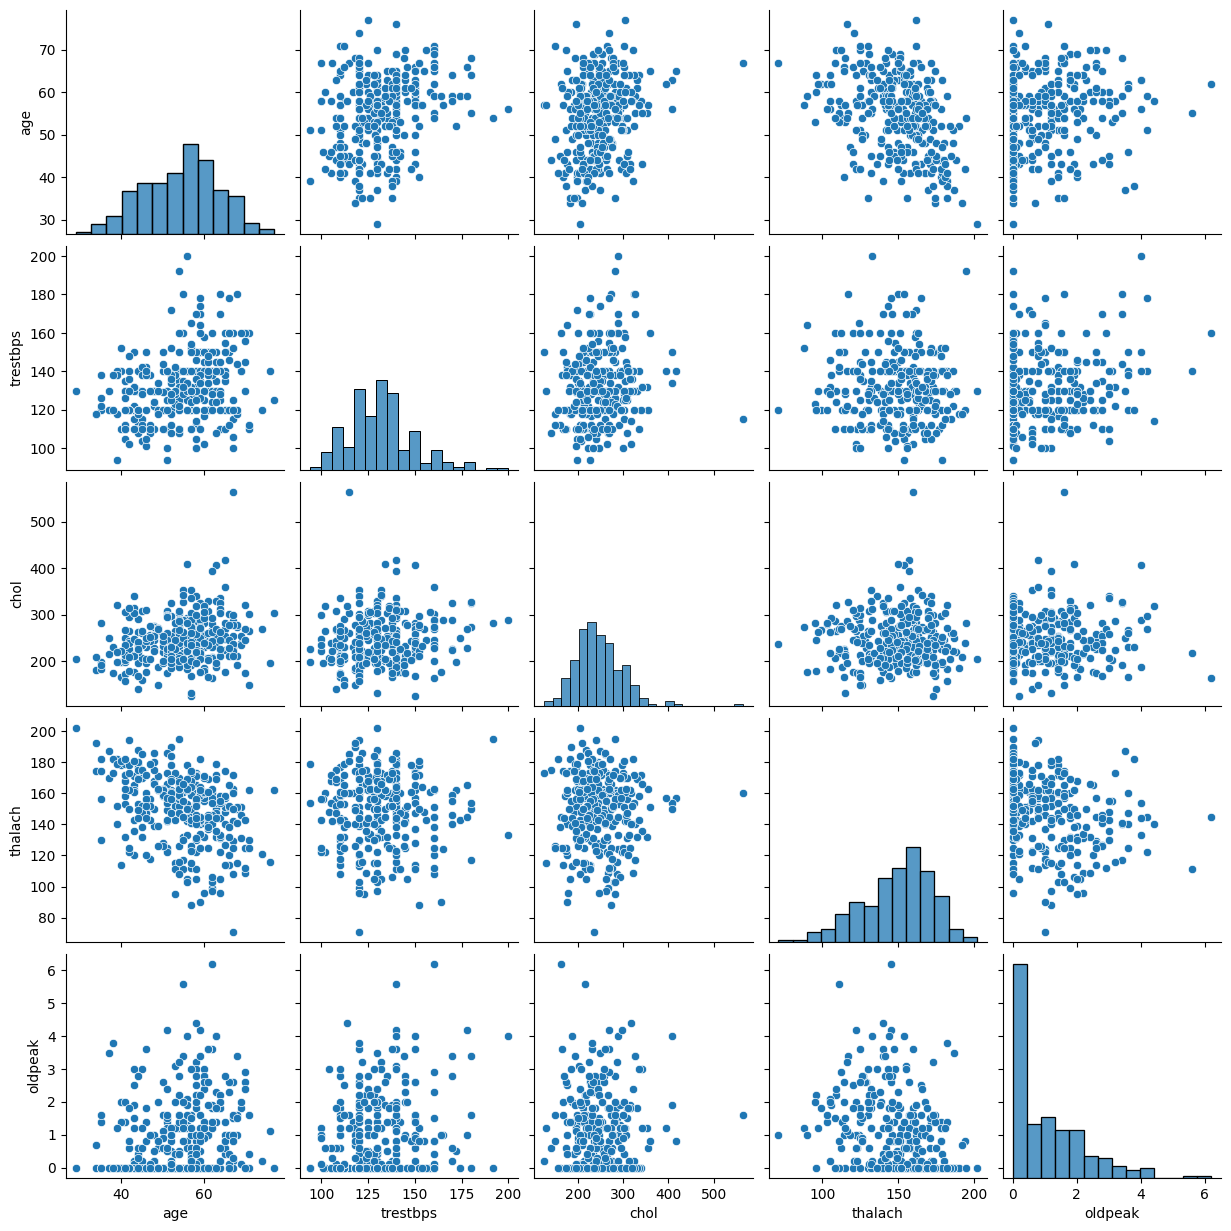

In [202]:
sns.pairplot(df)

In [203]:
# BOXPLOT PARA TODAS LAS VARIABLES NUMERICAS
def plot_boxplot(dataframe, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(10, 10))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        dataframe[var_name].plot(kind='box', ax=ax)
        ax.set_title(var_name, fontsize=11)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

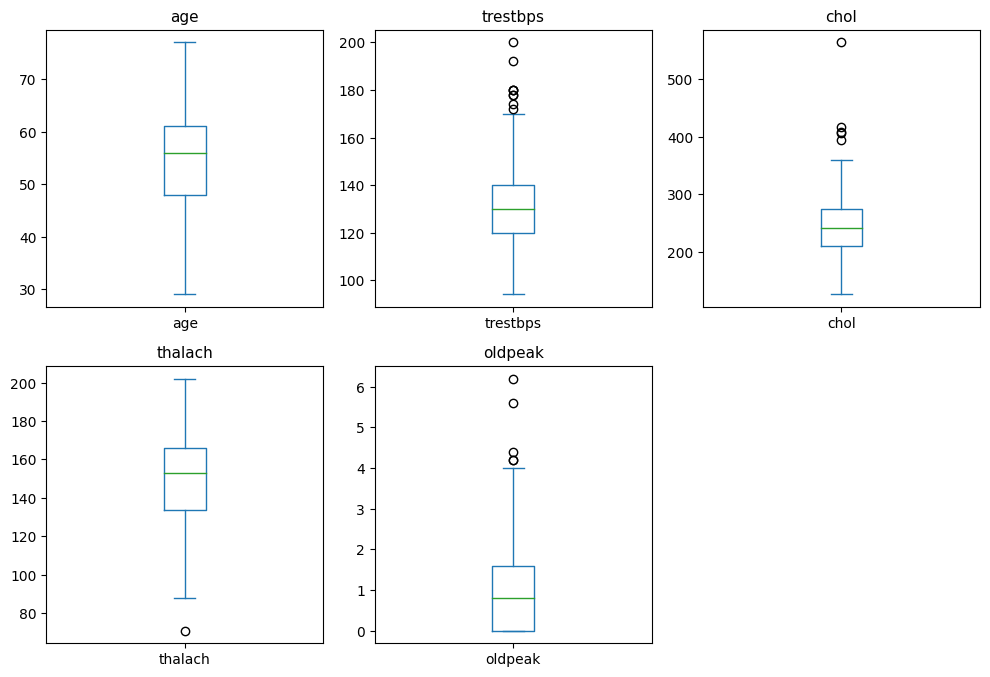

In [204]:
plot_boxplot(df, Variables_numericas, 3, 3)

### Transformacion de variables

In [205]:
def transformar(value):
    if value > 0:
        return 1
    else:
        return 0

df['num'] = df['num'].apply(transformar)

In [206]:
df['num'] = df['num'].astype('category')  # Convertir 'num' en variable categórica

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  num       303 non-null    category
dtypes: category(9), float64(5)
memory usage: 16.0 KB


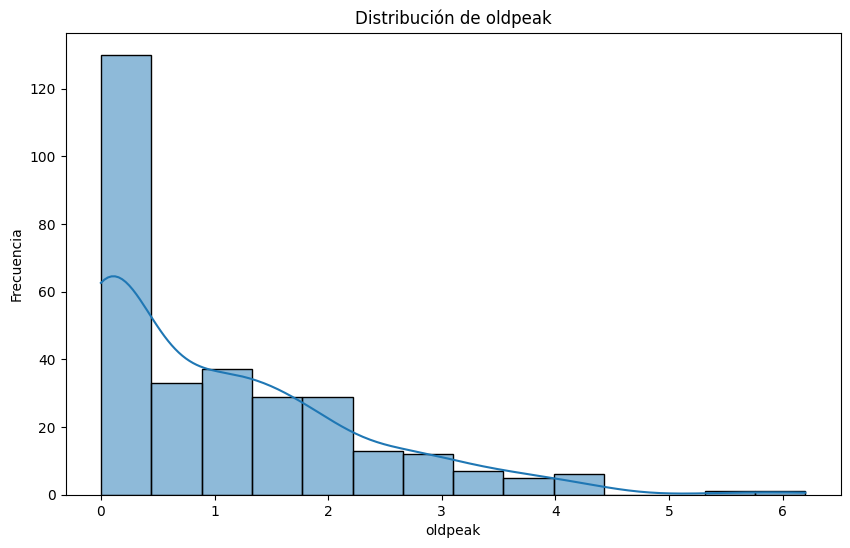

In [208]:
# Crear histograma y gráfico de densidad
plt.figure(figsize=(10, 6))
sns.histplot(df['oldpeak'], kde=True)
plt.xlabel('oldpeak')
plt.ylabel('Frecuencia')
plt.title('Distribución de oldpeak')
plt.show()

In [209]:
# Exportar el DataFrame a un archivo Excel
#df['oldpeak'].to_excel('prueba.xlsx', index=False)

In [210]:
#df['oldpeak_log'] = np.log(df['oldpeak'] + 0.0001)  # Agregar 0.001 para evitar ceros

In [211]:
# from sklearn.preprocessing import PowerTransformer, MinMaxScaler
# from sklearn.pipeline import Pipeline 

# scaler = MinMaxScaler(feature_range=(1, 2)) # Box-Cox requiere que los valores de entrada sean positivos.
# power = PowerTransformer(method= 'box-cox' )
# pipeline = Pipeline(
#     steps=[
#     ( 's' , scaler),
#     ( 'p' , power)
# ])
# df['oldpeak_log'] = pipeline.fit_transform(df[['oldpeak']])


In [212]:
# # Crear histograma y gráfico de densidad
# plt.figure(figsize=(10, 6))
# sns.histplot(df['oldpeak_log'], kde=True)
# plt.xlabel('oldpeak_log')
# plt.ylabel('Frecuencia')
# plt.title('Distribución de oldpeak_log')
# plt.show()

In [213]:
#CAPPING DE OUTLIERS 
#['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Establece el valor máximo designado
max_value_age = np.mean(df['age']) + 3 * np.std(df['age'])
max_value_trestbps = np.mean(df['trestbps']) + 3 * np.std(df['trestbps'])
max_value_chol = np.mean(df['chol']) + 3 * np.std(df['chol'])
max_value_thalach = np.mean(df['thalach']) + 3 * np.std(df['thalach'])
max_value_oldpeak = np.mean(df['oldpeak']) + 3 * np.std(df['oldpeak'])

# Reemplaza los outliers por el valor máximo designado
#df['age'] = np.where(df['age'] > max_value_age, max_value_age, df['age'])
df['trestbps'] = np.where(df['trestbps'] > max_value_trestbps, max_value_trestbps, df['trestbps'])
df['chol'] = np.where(df['chol'] > max_value_chol, max_value_chol, df['chol'])
#df['thalach'] = np.where(df['thalach'] > max_value_thalach, max_value_thalach, df['thalach'])
df['oldpeak'] = np.where(df['oldpeak'] > max_value_oldpeak, max_value_oldpeak, df['oldpeak'])

In [214]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df.drop('num', axis=1)  # Todas las columnas excepto 'num'
y = df['num']

# Aplicar codificación one-hot a las variables categóricas
X = pd.get_dummies(X,dtype='bool')

# Verificar la estructura del DataFrame resultante
X.head()


,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,63.0,145.0,233.0,150.0,2.3,False,True,True,False,False,...,True,True,False,False,False,False,False,True,False,False
1,67.0,160.0,286.0,108.0,1.5,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,67.0,120.0,229.0,129.0,2.6,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,37.0,130.0,250.0,187.0,3.5,False,True,False,False,True,...,True,True,False,False,False,False,True,False,False,False
4,41.0,130.0,204.0,172.0,1.4,True,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False


In [215]:
X.shape

(303, 30)

In [216]:
y.shape

(303,)

### Division de los datos en train y test

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Estandarización/Escalamiento de las variables

In [218]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [219]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier

### Regresión Logistica

In [220]:
logreg = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
logreg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)

<Axes: >

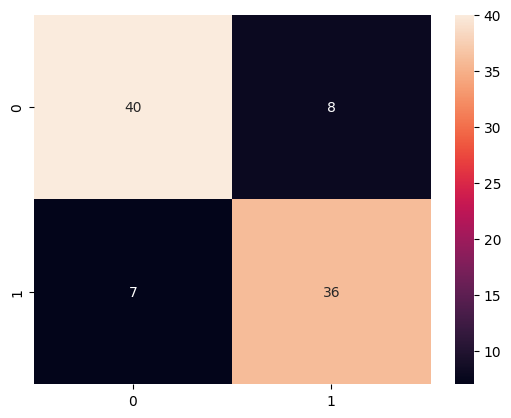

In [221]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

#PLOT THE MATRIX
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [222]:
#PRINT DEL REPORT CLASSIFICATION
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.82      0.84      0.83        43

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



### Regresion logistica con CV

In [223]:
logregCV = LogisticRegressionCV(cv=5)

# Entrenar el modelo con el conjunto de entrenamiento
logregCV.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)

<Axes: >

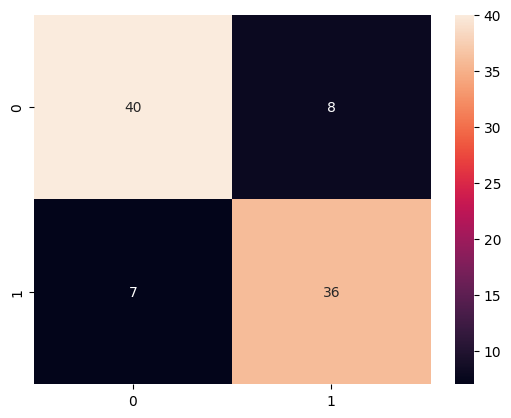

In [224]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

#PLOT THE MATRIX
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [225]:
#PRINT DEL REPORT CLASSIFICATION
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.82      0.84      0.83        43

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



### SGDClassifier

In [226]:
SGDClasif = SGDClassifier(loss='log_loss',random_state=42,max_iter=1000,tol=0.001,)

# Entrenar el modelo con el conjunto de entrenamiento
SGDClasif.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = SGDClasif.predict(X_test)

<Axes: >

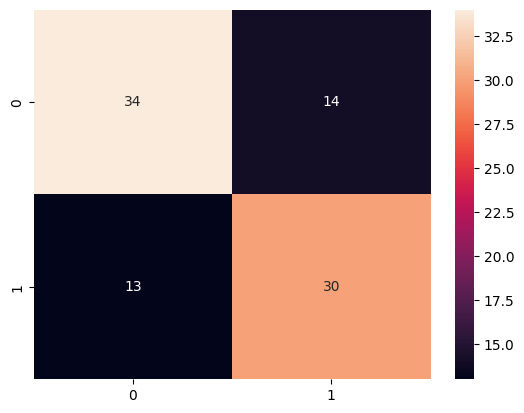

In [227]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

#PLOT THE MATRIX
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [228]:
#PRINT DEL REPORT CLASSIFICATION
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72        48
           1       0.68      0.70      0.69        43

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



### Random Forest

In [229]:
RF = RandomForestClassifier(n_estimators=20, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
RF.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = RF.predict(X_test)

<Axes: >

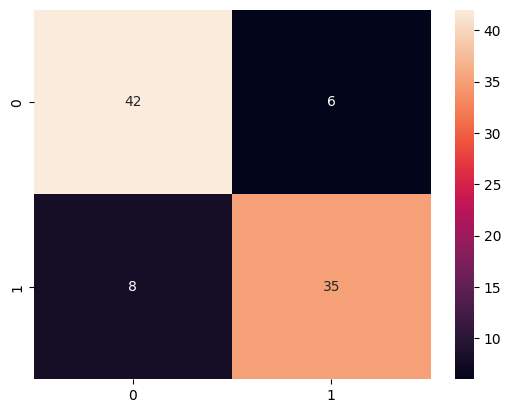

In [230]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

#PLOT THE MATRIX
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [231]:
#PRINT DEL REPORT CLASSIFICATION
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.85      0.81      0.83        43

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91

